In [1]:
########### Preparation ##############
# import packages
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Import des données
On crée un dataframe Egos qui contient non seulement les informations sur les egos mais aussi leur réseau personnel (egoNet) avec les données des alters.

In [5]:
Egos = pd.read_csv('../data/ego_data.csv', sep = ",")
Alters = pd.read_csv('../data/alter_attributes.csv', sep = ",")
AltersEdglist = pd.read_table('../data/alter_ties.csv', sep = ",")

def CreatingEgoNet(ego_ID):
    egoNet = nx.from_pandas_edgelist(AltersEdglist[AltersEdglist["ego_ID"]==ego_ID], 'from','to', create_using=nx.Graph())
    nodeData = Alters[Alters["ego_ID"]==ego_ID].set_index('alter_ID').to_dict('index').items()
    egoNet.add_nodes_from(nodeData)
    return egoNet
Egos["egoNet"] = Egos["ego_ID"].apply(CreatingEgoNet)
Egos.set_index("ego_ID", inplace=True)

On peut facilement visualiser le réseau de n'importe quel ego de cette façon

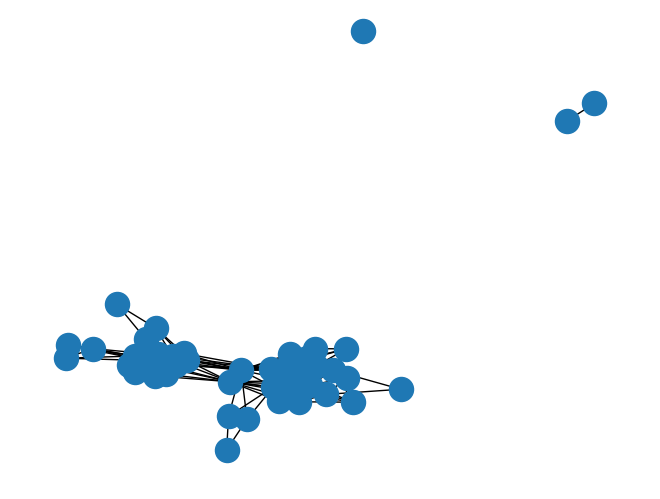

In [9]:
nx.draw(Egos.loc[149,"egoNet"])